<a href="https://colab.research.google.com/github/saw9090/-/blob/main/real_time_model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
from skfda.representation.basis import CustomBasis
from skfda import FDataGrid

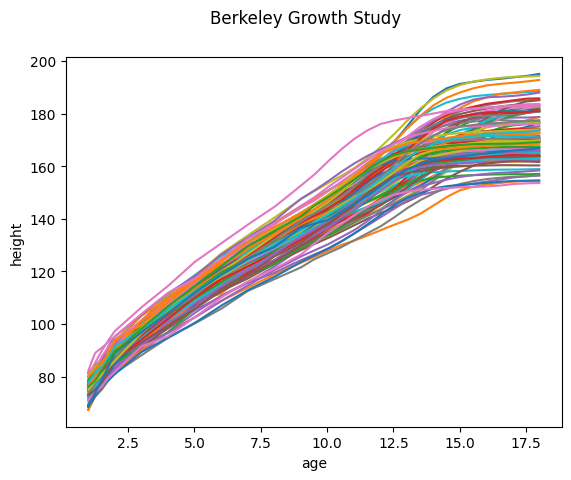

In [58]:
import skfda
import matplotlib.pyplot as plt

X, y = skfda.datasets.fetch_growth(return_X_y=True)

X.plot()
plt.show()

In [59]:
len(X.grid_points[0])

31

In [60]:
import numpy as np
def fun(x, t):
  return np.maximum(x - t, 0) ** 3
def poli(x,p) :
  return x**p

In [61]:
import numpy as np
import skfda
from skfda.representation.grid import FDataGrid

In [62]:
X.grid_points[0]

array([ 1.  ,  1.25,  1.5 ,  1.75,  2.  ,  3.  ,  4.  ,  5.  ,  6.  ,
        7.  ,  8.  ,  8.5 ,  9.  ,  9.5 , 10.  , 10.5 , 11.  , 11.5 ,
       12.  , 12.5 , 13.  , 13.5 , 14.  , 14.5 , 15.  , 15.5 , 16.  ,
       16.5 , 17.  , 17.5 , 18.  ])

In [63]:
X, y = skfda.datasets.fetch_growth(return_X_y=True)
grid = X.grid_points[0]
basis_matrix = np.zeros((4,len(X.grid_points[0])))
for i in range(4) :
  basis_matrix[i,:] = poli(x=grid, p=i)
for i in np.arange(6, 18) :
  basis_matrix = np.vstack((basis_matrix, fun(x=grid, t=i)))

In [64]:
X_train.shape

(90, 31)

In [65]:
basis_matrix.shape

(16, 31)

In [66]:
X, y = skfda.datasets.fetch_growth(return_X_y=True)
X_train = np.squeeze(X.data_matrix)[:-3,:]
y_train = X_train[:,-1]
X_test = np.squeeze(X.data_matrix)[-3:,:]
y_test = X_test[:,-1]

In [67]:
from skfda.misc import inner_product
N = X_train.shape[0]
K = basis_matrix.shape[0]
X_matrix = np.zeros((N,K))
for n in range(N):
  for k in range(K) :
    fd1 = skfda.FDataGrid(X_train[n,:],grid)
    fd2 = skfda.FDataGrid(basis_matrix[k,:],grid)
    X_matrix[n,k] = inner_product(fd1, fd2)
beta = np.linalg.pinv(X_matrix.T @ X_matrix) @ X_matrix.T @ y_train

In [68]:
X_pred = np.zeros(K)
for k in range(K) :
    fd1 = skfda.FDataGrid(X_test[0,:],grid)
    fd2 = skfda.FDataGrid(basis_matrix[k,:],grid)
    X_pred[k] = inner_product(fd1, fd2)
print(beta @ X_pred)
print(y_test[0])

166.67026289307978
166.8


In [69]:
from skfda.misc import inner_product
N = X_train.shape[0]
T = 6
beta = np.zeros(K)
grid = X.grid_points[0][:11]
X_matrix = np.zeros((N,T))
for n in range(N):
  for t in range(T) :
    fd1 = skfda.FDataGrid(X_train[n,:11],grid)
    fd2 = skfda.FDataGrid(basis_matrix[t,:11],grid)
    X_matrix[n,t] = inner_product(fd1, fd2)
beta[:T] = np.linalg.pinv(X_matrix.T @ X_matrix) @ X_matrix.T @ y_train

In [70]:
beta[:T]

array([  5.5770102 ,  -6.96296914,   2.64646841,  -0.2945696 ,
        14.67398665, -78.36545054])

In [71]:
for j in range(3) :
  X_pred = np.zeros(T)
  for t in range(T) :
    fd1 = skfda.FDataGrid(X_test[j,:11],grid)
    fd2 = skfda.FDataGrid(basis_matrix[t,:11],grid)
    X_pred[t] = inner_product(fd1, fd2)
  print(beta[:T] @ X_pred)
  print(y_test[j])

167.4989920901794
166.8
179.1675990640224
168.6
178.11423338635905
169.2


In [72]:
X.grid_points[0]

array([ 1.  ,  1.25,  1.5 ,  1.75,  2.  ,  3.  ,  4.  ,  5.  ,  6.  ,
        7.  ,  8.  ,  8.5 ,  9.  ,  9.5 , 10.  , 10.5 , 11.  , 11.5 ,
       12.  , 12.5 , 13.  , 13.5 , 14.  , 14.5 , 15.  , 15.5 , 16.  ,
       16.5 , 17.  , 17.5 , 18.  ])

In [73]:
grid = X.grid_points[0][:11]
for m in range(K-T) :
  X_tilde = np.zeros((N,m+T))
  grid_new = X.grid_points[0][2*m+T+4:2*m+T+7]
  print(grid_new)
  for n in range(N):
    for t in range(m+T) :
      fd1 = skfda.FDataGrid(X_train[n,2*m+T+4:2*m+T+7],grid_new)
      fd2 = skfda.FDataGrid(basis_matrix[t,2*m+T+4:2*m+T+7],grid_new)
      X_tilde[n,t] = inner_product(fd1, fd2)
  X_tilde_0 = np.zeros(N)
  for n in range(N):
    fd1 = skfda.FDataGrid(X_train[n,2*m+T+4:2*m+T+7],grid_new)
    fd2 = skfda.FDataGrid(basis_matrix[m+T,2*m+T+4:2*m+T+7],grid_new)
    X_tilde_0[n] = inner_product(fd1, fd2)
  X_matrix += X_tilde
  beta_new = (y_train -X_matrix @ beta[:m+T]) @ X_tilde_0 /(X_tilde_0 @ X_tilde_0)
  X_matrix = np.hstack((X_matrix,X_tilde_0.reshape(-1,1)))
  beta[m+T] = beta_new

[8.  8.5 9. ]
[ 9.   9.5 10. ]
[10.  10.5 11. ]
[11.  11.5 12. ]
[12.  12.5 13. ]
[13.  13.5 14. ]
[14.  14.5 15. ]
[15.  15.5 16. ]
[16.  16.5 17. ]
[17.  17.5 18. ]


In [74]:
beta

array([ 5.57701020e+00, -6.96296914e+00,  2.64646841e+00, -2.94569605e-01,
        1.46739867e+01, -7.83654505e+01,  3.95032256e+02, -3.08269032e+03,
        2.91451386e+04, -2.84358435e+05,  2.78611005e+06, -2.73482107e+07,
        2.69056893e+08, -2.65319531e+09,  2.62097598e+10, -2.59146648e+11])

In [75]:
from skfda.misc import inner_product
def predict_train(m,t):
  grid = X.grid_points[0][:2*t-1]
  for n in range(N):
    for k in range(K) :
      fd1 = skfda.FDataGrid(X_train[n,:2*t-1],grid)
      fd2 = skfda.FDataGrid(basis_matrix[k,:2*t-1],grid)
      X_matrix[n,k] = inner_product(fd1, fd2)
  return beta[:t] @ X_matrix[m,:t]

In [76]:
predict_train(0,7)

192.71670612724483

In [78]:
y_train

array([195.1, 178.7, 171.5, 181.8, 172.5, 173.8, 172.6, 185.2, 172.9,
       188.4, 181.6, 189. , 182.4, 185.8, 178.7, 183.4, 183. , 177. ,
       175. , 176.8, 176.4, 174. , 181. , 170.1, 175.2, 185.1, 182.7,
       169.4, 194.3, 181.1, 181.3, 192.8, 176.4, 174.1, 188. , 180.8,
       183.7, 180.7, 176.4, 158.9, 166. , 162.2, 167.8, 170. , 164.9,
       164. , 183.2, 163.8, 174. , 167.1, 163. , 154.6, 170.3, 170.6,
       156.5, 160.3, 170.8, 165.2, 169.8, 171.2, 163.8, 162.4, 157.1,
       181.1, 158.4, 165.6, 166.7, 156.5, 168.1, 165.3, 163.7, 173.7,
       163.9, 169.2, 166. , 164.2, 176. , 170.9, 169.2, 163. , 154.5,
       172.5, 167.2, 164. , 162.1, 161.6, 153.6, 177.5, 169.8, 173.5])

In [79]:
grid = X.grid_points[0][:11]
grid_new = X.grid_points[0][10:13]
for j in range(3) :
  X_pred = np.zeros(T+1)
  beta[T] = beta_new
  for t in range(T) :
    fd1 = skfda.FDataGrid(X_test[j,:11],grid)
    fd2 = skfda.FDataGrid(basis_matrix[t,:11],grid)
    X_pred[t] = inner_product(fd1, fd2)
  fd1 = skfda.FDataGrid(X_test[j,10:13],grid_new)
  fd2 = skfda.FDataGrid(basis_matrix[t,10:13],grid_new)
  X_pred[T] = inner_product(fd1, fd2)
  print(beta[:T+1] @ X_pred)
  print(y_test[j])

-130177999690036.4
166.8
-136254988593943.67
168.6
-135013244237244.86
169.2


In [80]:
X.grid_points[0][10:13]

array([8. , 8.5, 9. ])

In [81]:
beta_new

-259146648354.75232